# Wave equation

$
\frac{\partial^2 u}{\partial t^2} -c^2 \frac{\partial^2 u}{\partial x^2} = 0
$

# Second order numerical solution

Starting with center difference méthode for both t and x derivatives

$
\frac{u^{t+1}_{x}-2u^{t}_{x}+u^{t-1}_{x}}{dt^2} = c^2 \frac{u^{t}_{x+1}-2u^{t}_{x}+u^{t}_{x-1}}{dx^2}
$

$
\Rightarrow u^{t+1}_{x} = c^2\frac{dt^2}{dx^2}\left(u^{t}_{x+1} + u^{t}_{x-1} \right) + 2\left(1 -  c^2\frac{dt^2}{dx^2}\right) u^{t}_{x} - u^{t-1}_{x}
$

For this methode, resolution of a system like those of heat_equation system is not requirered

In [1]:
import numpy as np

import matplotlib.pyplot as plt

from IPython.display import Image

In [2]:
from utils import IMAGE_FOLDER

In [3]:
# Initials conditions

c = 0.7

x_min = -2 * np.pi
x_max = 2 * np.pi
dx = 0.1
x_axes = np.arange(x_min, x_max, dx)

u0 = np.zeros(x_axes.shape)
u0[len(u0)//4:-len(u0)//4] = np.sin(x_axes[len(u0)//4:-len(u0)//4])

t0 = 0
dt = 0.1
T = 50



In [4]:
# fast calc

cfrac = c ** 2 * (dt ** 2 / dx ** 2)
factor = 2 * (1 - cfrac)

In [5]:
# Bondary conditions

def bound(u): 
    u[0] = 0
    u[-1] = 0
    return u

In [6]:
un = bound(u0)
states = [un, un]

for i, t in enumerate(np.arange(t0, T, dt)):
    un = cfrac * (np.roll(un, 1) + np.roll(un, -1)) + factor * un - states[-2]
    un = bound(un)
    states.append(un)


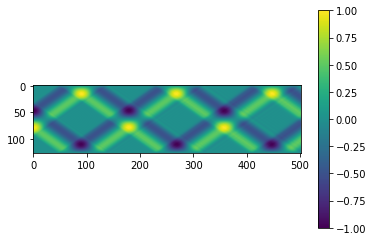

In [7]:
image_path = IMAGE_FOLDER / "wave_eq1.jpeg"
image_array = np.vstack(states).T
plt.imshow(np.clip(image_array, -1, 1))
plt.colorbar()
plt.savefig(image_path)

# 2D version

$
\Rightarrow u^{t+1}_{x} = c^2dt^2\left(\frac{1}{dx^2}\left(u^{t}_{x+1} + u^{t}_{x-1} \right) + \frac{1}{dy^2}\left(u^{t}_{y+1} + u^{t}_{y-1} \right)\right) + 2 c^2 dt^2\left(1 -  \frac{1}{dx^2} - \frac{1}{dy^2} \right) u^{t}_{x} - u^{t-1}_{x}
$

In [8]:
# Initials conditions

c = 0.8

x_min = -2 * np.pi
x_max = 2 * np.pi
dx = 0.5
x_axes = np.arange(x_min, x_max, dx)

y_min = 0
y_max = 10 * np.pi
dy = 0.5
y_axes = np.arange(y_min, y_max, dy)

u0 = np.zeros((x_axes.shape[0], y_axes.shape[0]))

t0 = 0
dt = 0.5
T = 40

h = len(x_axes)
w = len(y_axes)

In [9]:
cfrac = c ** 2 * dt ** 2
odx2 = 1 / dx ** 2
ody2 = 1 / dy ** 2
factor = 2 * cfrac * (1 - odx2 - ody2)

In [10]:
# Bondary conditions

def bound(u, t): 
    u[0] = 0
    u[-1] = 0
    u[:, -1] = 0
    u[:, 0] = np.sin(t)
    u[::2, w//2] = 0
    #u[0:h//2, w//10] = 0
    #u[h//2 + 1, w//10] = 0
    #u[h//2+3:, w//10] = 0
    return u

In [11]:
un = bound(u0, 0)
states = [un, un]
time = np.arange(t0, T, dt)
n = len(time)

for i, t in enumerate(time):
    un = cfrac * (np.roll(un, 1) + np.roll(un, -1) + np.roll(un, 1, axis=1) + np.roll(un, -1, axis=1)) + factor * un - states[-2]
    un = bound(un, t)
    states.append(un)

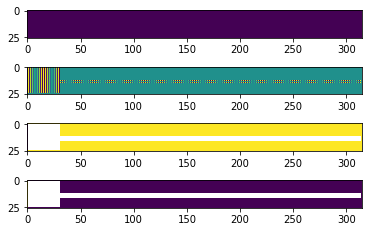

In [12]:
image_path = IMAGE_FOLDER / "wave_eq2.jpeg"
image_array = np.stack(states)
fig, ax = plt.subplots(4)
ax[0].imshow(np.clip(image_array[0], -1, 1))
ax[1].imshow(np.clip(image_array[n // 3], -1, 1))
ax[2].imshow(np.clip(image_array[2 * n // 3], -1, 1))
ax[3].imshow(np.clip(image_array[-1], -1, 1))

del states
del image_array

#fig.colorbar()
fig.savefig(image_path)

With no suprise it does not work for diffraction